In [10]:
pip install numpy==1.23.1


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
# EDA 사전 세팅
%matplotlib inline

import time
import os

os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 

In [12]:
train = pd.read_csv("/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project1/train.csv")

In [13]:
test = pd.read_csv("/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project1/test.csv")

In [14]:
sample_submission = pd.read_csv("/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project1/submission.csv")

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
train.info() #train 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
test.info() #test 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [19]:
train.isnull().sum() #결측값 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
test.isnull().sum() #결측값 확인

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
train.describe() #데이터 속성 확인 ( 숫자값 )

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
test.describe() #데이터 속성 확인 ( 숫자값 )

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
train.corr() #상관관계 분석

/var/folders/cx/r_wdv_3d2q7_cr1m0yrq3dph0000gn/T/ipykernel_2381/1779678999.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr() #상관관계 분석


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [24]:
test.corr() #상관관계 분석

/var/folders/cx/r_wdv_3d2q7_cr1m0yrq3dph0000gn/T/ipykernel_2381/1815622449.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.corr() #상관관계 분석


,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


/var/folders/cx/r_wdv_3d2q7_cr1m0yrq3dph0000gn/T/ipykernel_2381/1599692733.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap="pink")


<Axes: >

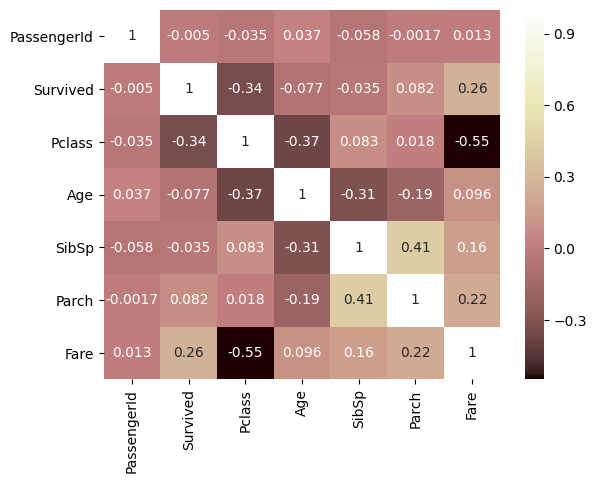

In [25]:
sns.heatmap(train.corr(), annot=True, cmap="pink") 

/var/folders/cx/r_wdv_3d2q7_cr1m0yrq3dph0000gn/T/ipykernel_2381/3686828750.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr(), annot=True, cmap="pink")


<Axes: >

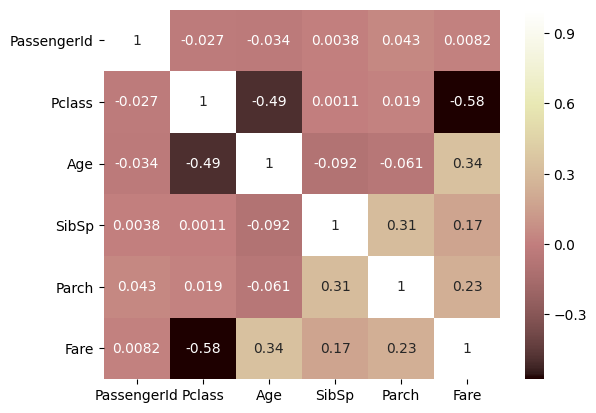

In [26]:
sns.heatmap(test.corr(), annot=True, cmap="pink") 

In [27]:
train['Sex'] = train['Sex'].replace('male',0)
test['Sex'] = test['Sex'].replace('male',0)
#남자인 경우 0으로 연속성 자료로 바꿈

In [28]:
train['Sex'] = train['Sex'].replace('female',1)
test['Sex'] = test['Sex'].replace('female',1)
#여자인 경우 1인 연속성 자료로 바꿈

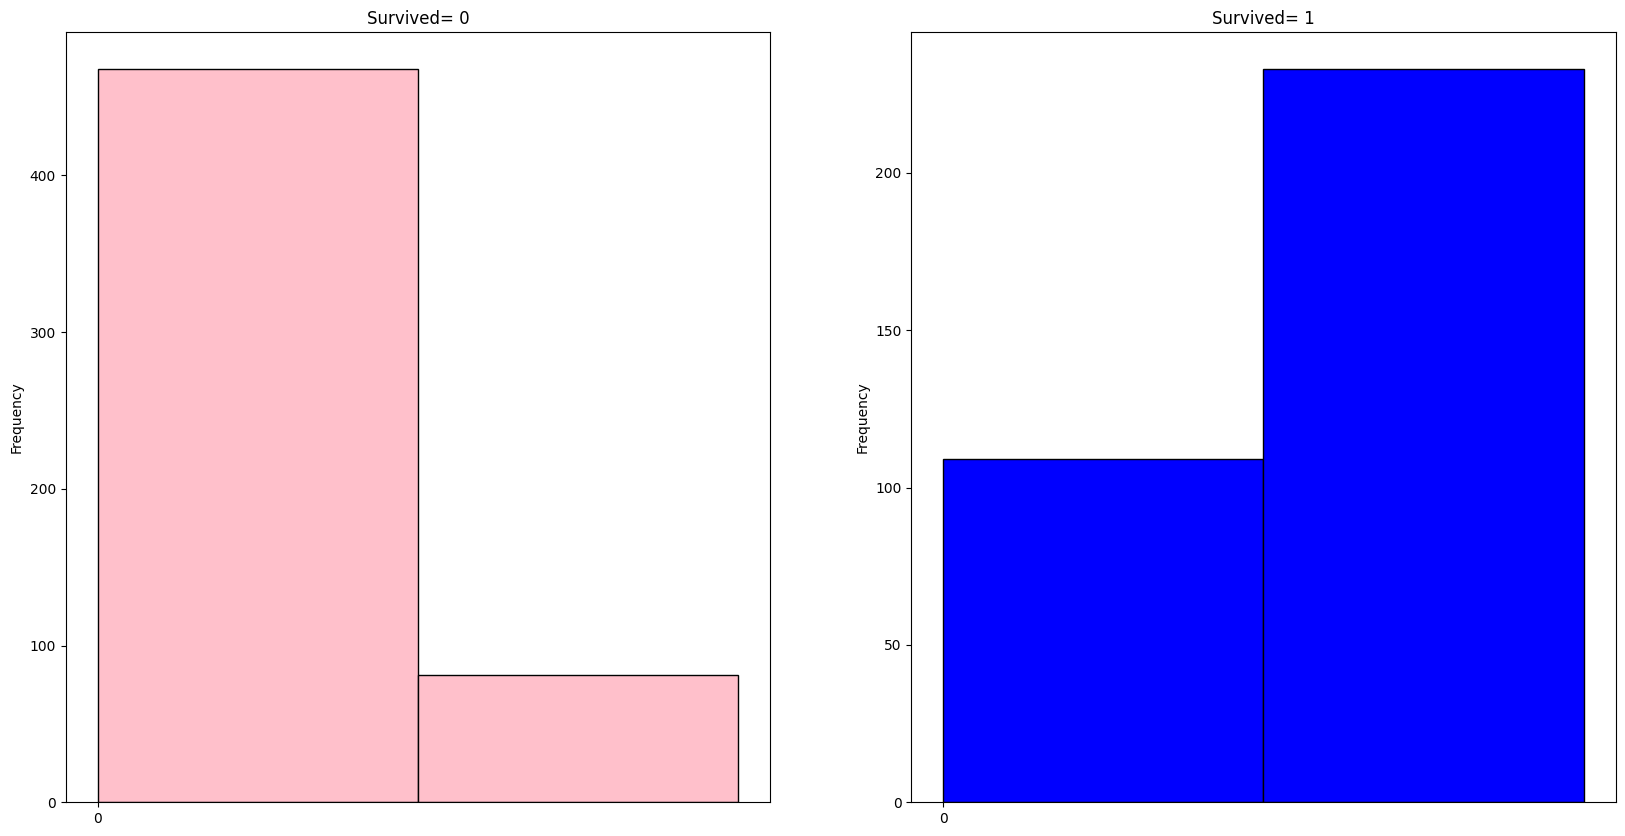

In [32]:
# 성별로 나눈 생존자 
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Sex.plot.hist(ax=ax[0],bins=2,edgecolor='black',color='pink')
ax[0].set_title('Survived= 0')
x1=list(range(0,2,5))
ax[0].set_xticks(x1)

train[train['Survived']==1].Sex.plot.hist(ax=ax[1],color='blue',bins=2,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,2,5))
ax[1].set_xticks(x2)
plt.show()

In [34]:
train.head() #변경됐는지 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test.head() #변경됐는지 확인

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1 
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1
    #Sibsp 한번에 탄 사람들 표시

In [38]:
from collections import Counter
a=Counter(train["Embarked"])
print(a)
#embarked 빈도수 확인

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})


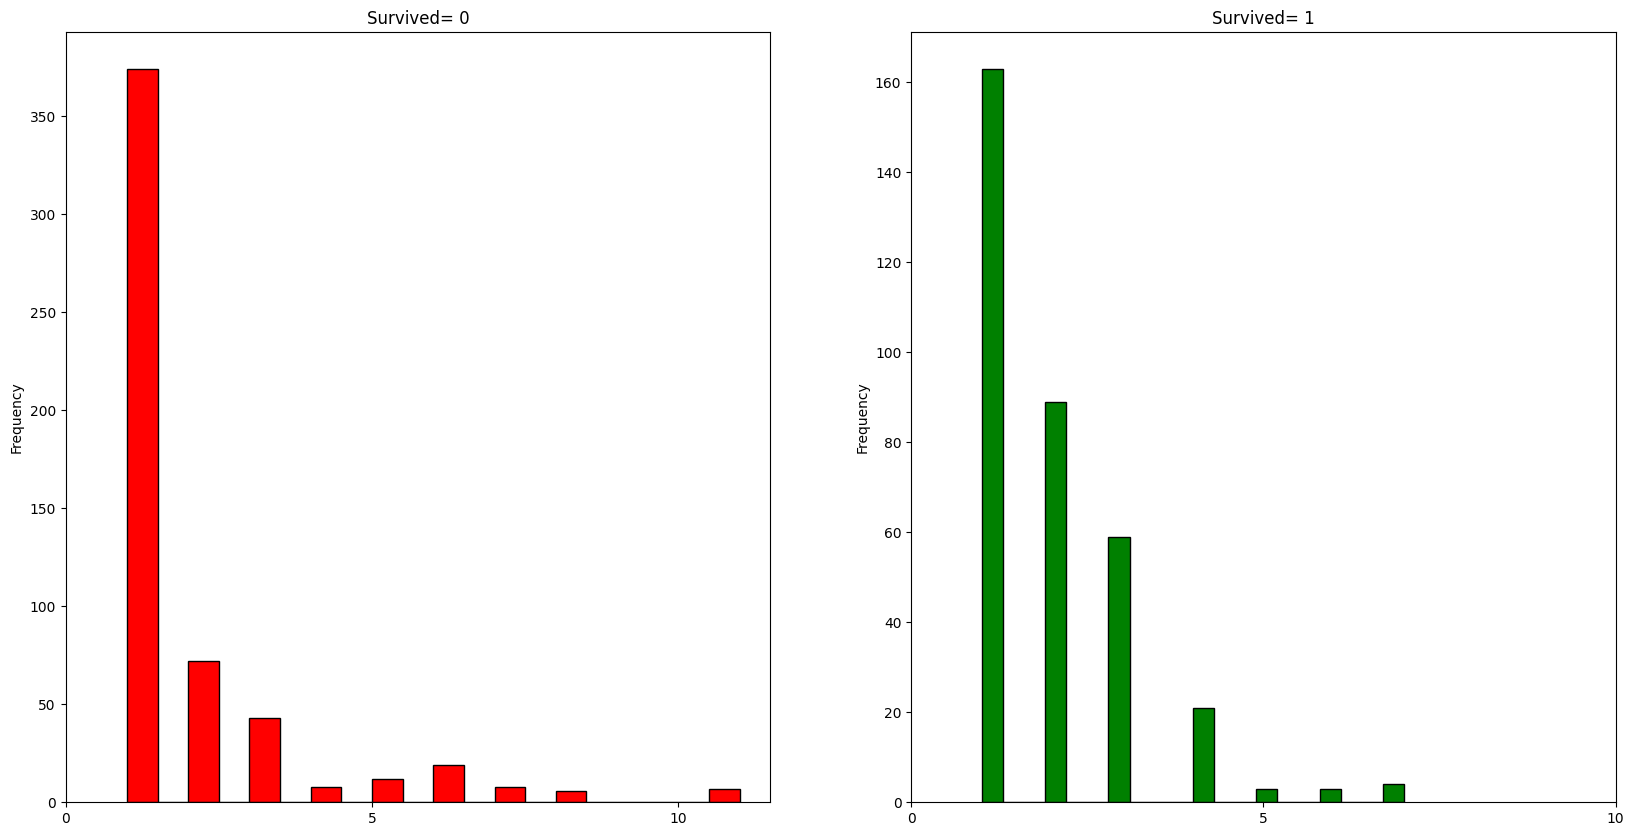

In [40]:
# FmailySize와 생존 그래프
# familtsize가 1인 사람들이 제일 많이 죽고 제일 많이 살았음
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].FamilySize.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,15,5))
ax[0].set_xticks(x1)

train[train['Survived']==1].FamilySize.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,15,5))
ax[1].set_xticks(x2)
plt.show()

In [44]:
# Embarked 결측값 빈도수가 가장 많은 S로 채우고 연속형 자료로 바꿈
test["Embarked"] = test["Embarked"].fillna("S")
test['Embarked'] = test['Embarked'].map({'S':0, 'Q':1, 'C':2})

In [46]:
# Embarked 결측값 빈도수가 가장 많은 S로 채우고 연속형 자료로 바꿈
train["Embarked"] = train["Embarked"].fillna("S")
train['Embarked'] = train['Embarked'].map({'S':0, 'Q':1, 'C':2})

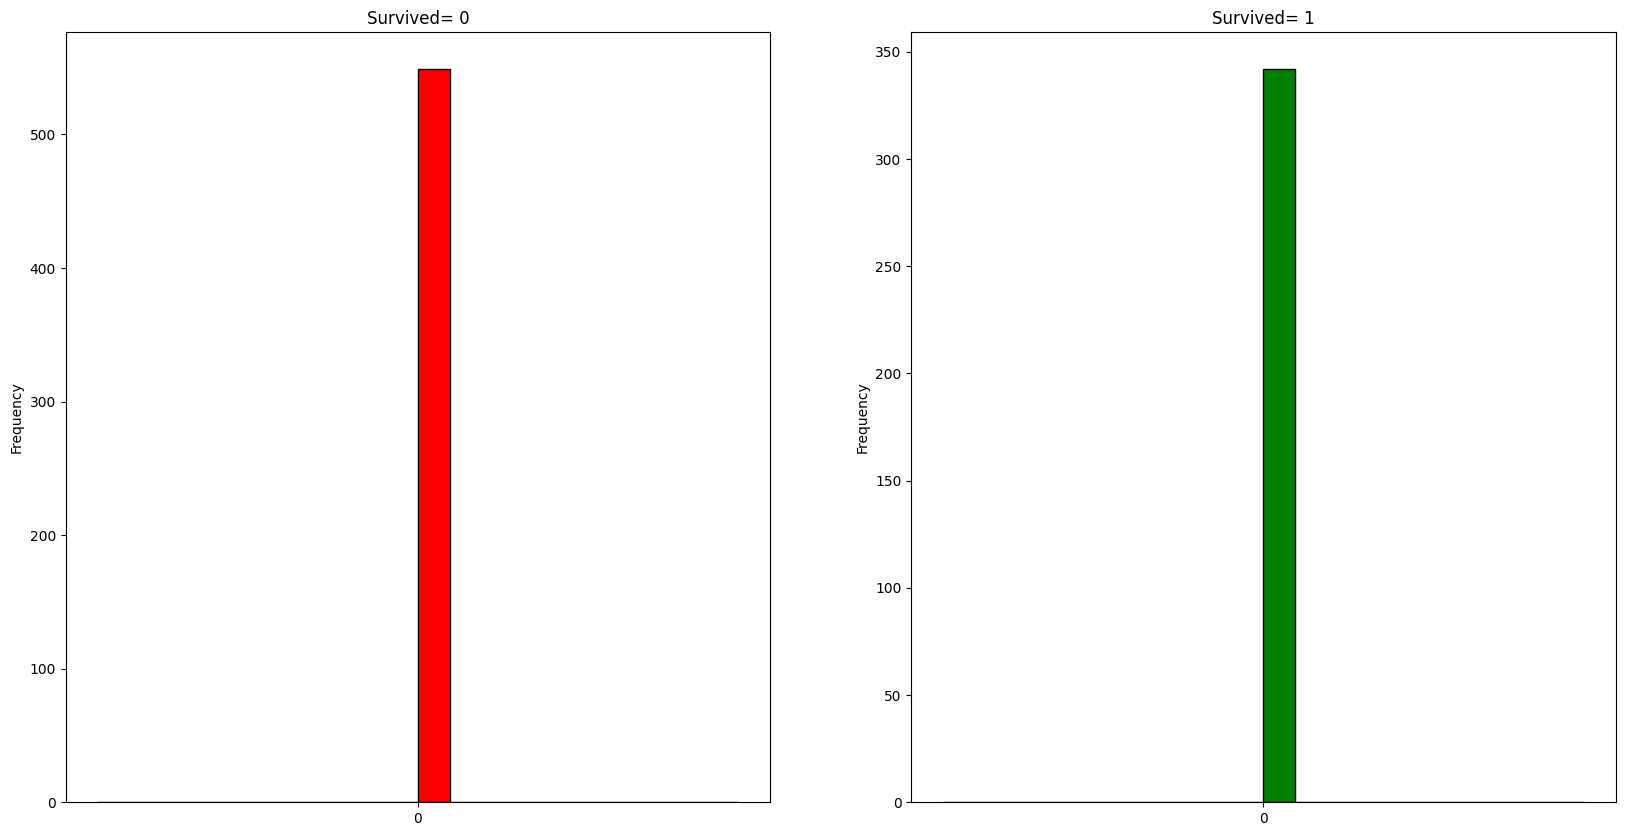

In [47]:
# embarked 와 생존
# S가 가장 빈도수가 많아서 그런지 생존자, 사망자 모두 s가 많았음
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Embarked.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,5,5))
ax[0].set_xticks(x1)

train[train['Survived']==1].Embarked.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,5,5))
ax[1].set_xticks(x2)
plt.show()

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 97.6+ KB


In [50]:
# train['Age']=train['Age'].fillna(value=train['Age'].mean())
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.')
print(train['Initial'])
print(train['Name'])

pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r')

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object
0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
0,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1
1,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0


In [51]:
train['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
0,40,0,528,0,9
1,0,186,1,127,0


In [52]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [53]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46


In [54]:
train.Age.isnull().sum()

0

In [55]:
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.')
print(test['Initial'])
print(test['Name'])

pd.crosstab(test.Initial,test.Sex).T.style.background_gradient(cmap='summer_r')

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Initial, Length: 418, dtype: object
0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object


Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
0,2,0,1,21,0,240,0,0,2
1,0,1,0,0,78,0,72,1,0


In [56]:
test['Initial'].replace(
    ['Ms','Dr','Col','Rev','Dona'],
    ['Miss','Mr','Other','Other','Mrs'],inplace=True)

pd.crosstab(test.Initial,test.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
0,21,0,241,0,4
1,0,79,0,73,0


In [57]:
test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age']=32
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age']=39
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age']=7
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age']=43

In [58]:
test.Age.isnull().sum()

0

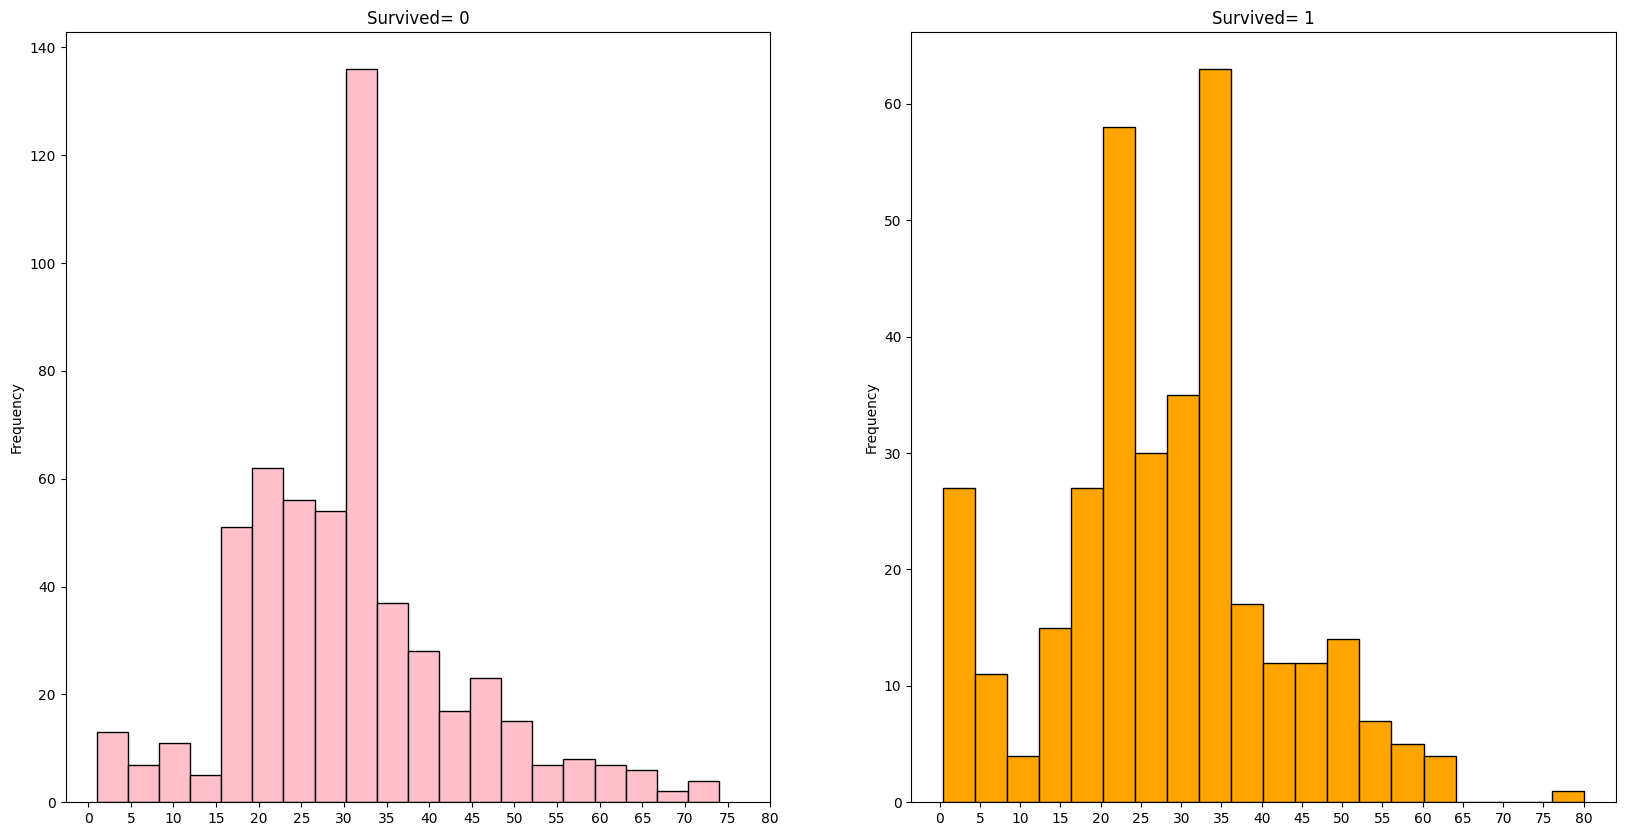

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='pink')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='orange',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [60]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
IsAlone          0
Initial          0
dtype: int64

In [61]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
IsAlone          0
Initial          0
dtype: int64

In [62]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Initial
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,0,1,1,Mr


In [66]:
# Fare가 결측값인 사람의 나이, pclass와 비슷한 조건을 가진 사람들만 추출
test[(test['Age']>=60) & (test['Pclass']==3)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Initial
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,0,1,1,Mr


In [70]:
# Fare 결측값을 가진 사람과 비슷한 조건인 사람들
test1 = test[(test['Age']>=60)&(test["Age"]<70)]

In [71]:
test1.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,12.000000,13.0,13.000000,13.000000
mean,1026.384615,1.461538,0.461538,62.269231,0.615385,0.769231,108.685075,0.0,2.384615,0.307692
std,90.679416,0.660225,0.518875,2.127355,0.506370,1.363442,102.395793,0.0,1.556624,0.480384
min,894.000000,1.000000,0.000000,60.000000,0.000000,0.000000,9.687500,0.0,1.000000,0.000000
25%,961.000000,1.000000,0.000000,60.500000,0.000000,0.000000,26.000000,0.0,1.000000,0.000000
50%,1034.000000,1.000000,0.000000,62.000000,1.000000,0.000000,75.770850,0.0,2.000000,0.000000
75%,1085.000000,2.000000,1.000000,64.000000,1.000000,1.000000,221.779200,0.0,3.000000,1.000000
max,1197.000000,3.000000,1.000000,67.000000,1.000000,4.000000,263.000000,0.0,6.000000,1.000000


In [72]:
from pandas.core import describe
test1.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,12.000000,13.0,13.000000,13.000000
mean,1026.384615,1.461538,0.461538,62.269231,0.615385,0.769231,108.685075,0.0,2.384615,0.307692
std,90.679416,0.660225,0.518875,2.127355,0.506370,1.363442,102.395793,0.0,1.556624,0.480384
min,894.000000,1.000000,0.000000,60.000000,0.000000,0.000000,9.687500,0.0,1.000000,0.000000
25%,961.000000,1.000000,0.000000,60.500000,0.000000,0.000000,26.000000,0.0,1.000000,0.000000
50%,1034.000000,1.000000,0.000000,62.000000,1.000000,0.000000,75.770850,0.0,2.000000,0.000000
75%,1085.000000,2.000000,1.000000,64.000000,1.000000,1.000000,221.779200,0.0,3.000000,1.000000
max,1197.000000,3.000000,1.000000,67.000000,1.000000,4.000000,263.000000,0.0,6.000000,1.000000


In [73]:
test1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          5
Embarked       0
FamilySize     0
IsAlone        0
Initial        0
dtype: int64

In [74]:
test1.describe()
#test1 통계량

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,12.000000,13.0,13.000000,13.000000
mean,1026.384615,1.461538,0.461538,62.269231,0.615385,0.769231,108.685075,0.0,2.384615,0.307692
std,90.679416,0.660225,0.518875,2.127355,0.506370,1.363442,102.395793,0.0,1.556624,0.480384
min,894.000000,1.000000,0.000000,60.000000,0.000000,0.000000,9.687500,0.0,1.000000,0.000000
25%,961.000000,1.000000,0.000000,60.500000,0.000000,0.000000,26.000000,0.0,1.000000,0.000000
50%,1034.000000,1.000000,0.000000,62.000000,1.000000,0.000000,75.770850,0.0,2.000000,0.000000
75%,1085.000000,2.000000,1.000000,64.000000,1.000000,1.000000,221.779200,0.0,3.000000,1.000000
max,1197.000000,3.000000,1.000000,67.000000,1.000000,4.000000,263.000000,0.0,6.000000,1.000000


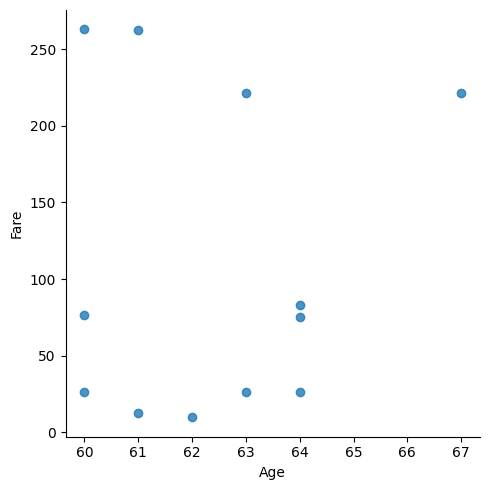

In [76]:
# test1에서 극단치 있는지없는지 확인
sns.lmplot(x='Age',y='Fare',data=test1,fit_reg=False)

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
 11  FamilySize   418 non-null    int64  
 12  IsAlone      418 non-null    int64  
 13  Initial      418 non-null    object 
dtypes: float64(2), int64(8), object(4)
memory usage: 45.8+ KB


In [79]:
# fare 결측값을 test1의 평균으로 채움
test['Fare']=test['Fare'].fillna(value=test1['Fare'].mean())

In [80]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
IsAlone          0
Initial          0
dtype: int64

In [81]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
IsAlone          0
Initial          0
dtype: int64

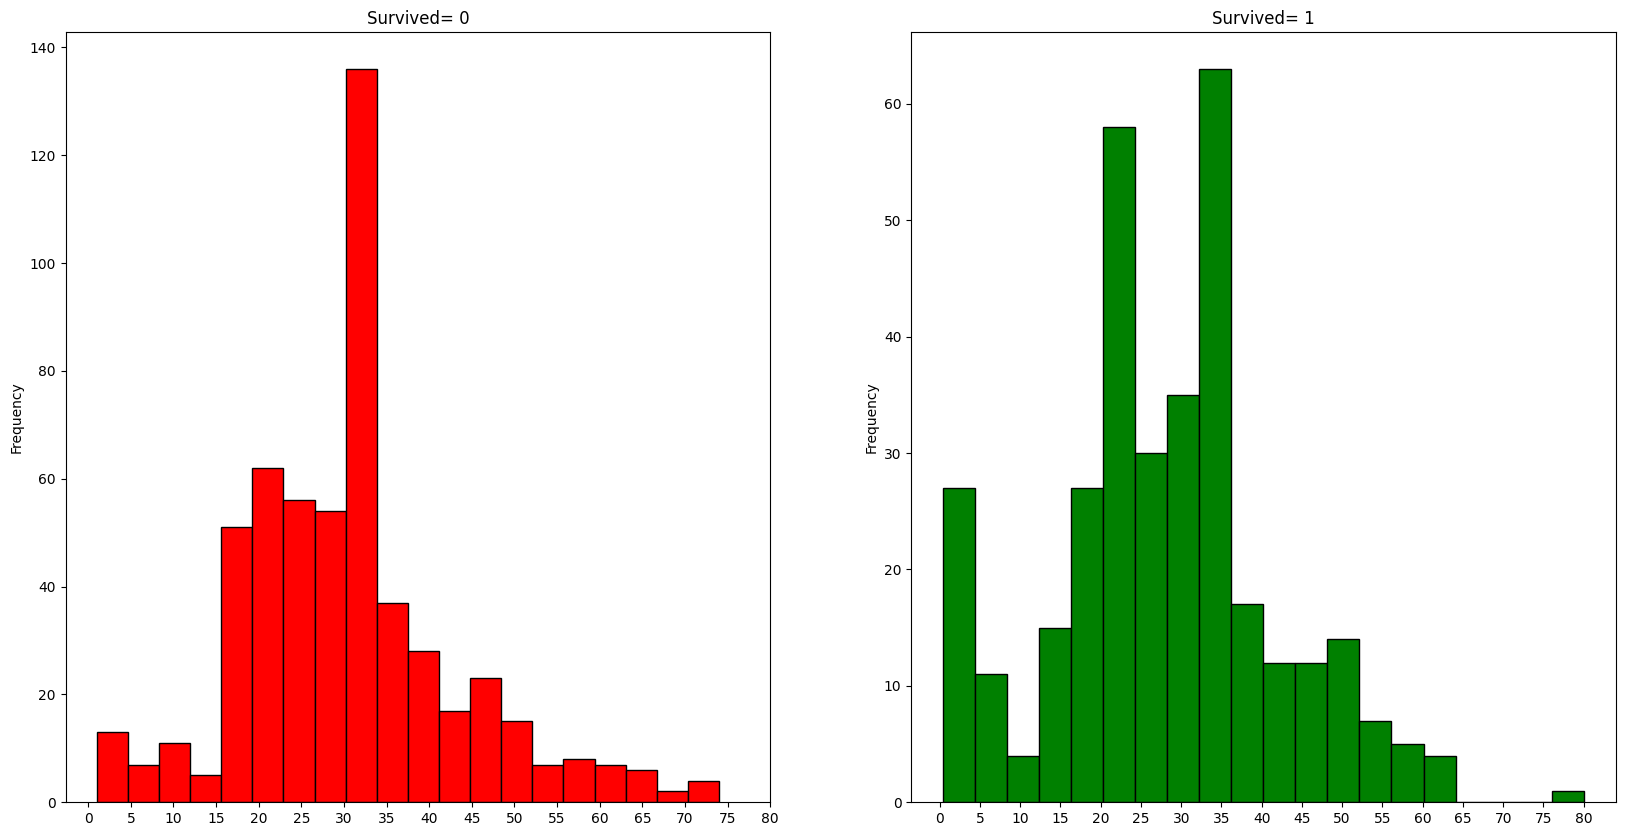

In [82]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [83]:
train.drop(['Cabin'],axis=1,inplace=True)

In [84]:
test.drop(['Cabin'],axis=1,inplace=True)

In [86]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
Initial        0
dtype: int64

In [85]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
Initial        0
dtype: int64

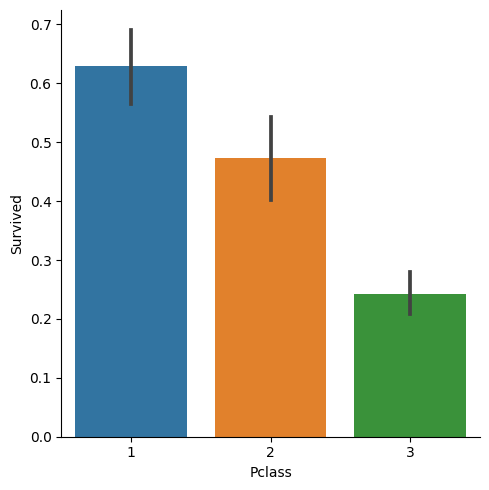

In [87]:
sns.catplot(data=train, x="Pclass",y="Survived",kind="bar")

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Initial
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,Mr


In [89]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Initial
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,2,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1,1,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,1,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,3,0,Mrs


In [92]:
train1 = train.drop(['Name', 'Ticket','Initial'], axis = 1)
test1 = test.drop(['Name', 'Ticket','Initial'], axis = 1)

In [94]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [95]:
# 모델링 기법 7가지 적용해보기

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [117]:
X_train = train1.drop(["PassengerId","Survived"], axis=1)
Y_train = train1["Survived"]
X_test  = test1.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape, sample_submission.shape

((891, 9), (891,), (418, 9), (418, 2))

로지스틱 모델 생성 예측

In [131]:
# 로지스틱 회귀 적용
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

logreg.score(X_test, Y_pred)

/opt/homebrew/Cellar/jupyterlab/3.6.1/libexec/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [101]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [102]:
sample_submission['Survived'] = Y_pred

In [103]:
sample_submission.to_csv('submission.csv', index = False)

## 랜덤 포레스트

전체 Feature 중 랜덤으로 일부 Feature만 선택해 하나의 결정 트리를 만들고, 또 전체 Feature 중 랜덤으로 일부 Feature를 선택해 또 다른 결정 트리를 만들며, 여러 개의 의사 결정 트리를 만드는 방식으로 구성됩니다.

- 이렇게 여러 결정 트리들이 내린 예측 값들 중, 가장 많이 나온 값을 최종 예측값으로 정합니다, 다수결의 원칙에 따르는 것입니다.
- 여러가지 결과를 합치는 방식을 앙상블이라고 합니다.

### 장점

- Classification(분류) 및 Regression(회귀) 문제에 모두 사용 가능
- Missing value(결측치)를 다루기 쉬움
- 대용량 데이터 처리에 효과적
- 모델의 노이즈를 심화시키는 Overfitting(오버피팅) 문제를 회피하여, 모델 정확도를 향상시킴
- Classification 모델에서 상대적으로 중요한 변수를 선정 및 Ranking 가능


## 의사 결정 트리

특정 Feature에 대한 질문을 기반으로 데이터를 분리하는 방법입니다.
흡연자 인가? Yes 몇살인가 NO 다이어트를 하고 있는가 등등...

In [105]:
# Randomforest 적용
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

random_forest.score(X_test, Y_pred)

1.0

## SVM 이란?
- SVM은 분류에 사용되는 지도학습 머신러닝 모델이다.

In [106]:
# SVC 적용
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

svc.score(X_test, Y_pred)

1.0

## K-nearest ( 최근접 이웃 )
주어진 데이터 셋에서 입력 데이터 포인트에서 가장 가까운 포인트를 찾는 것으로 데이터 분류 시스템에서 자주 사용이 된다.

In [108]:
# 최근접(K-nearest) 이웃 적용
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

knn.score(X_test, Y_pred)

1.0

## 결정 트리

분류와 회귀 모두 가능한 지도 학습 모델 중 하나
- 스무고개 하듯이 예/아니오 질문을 이어가며 학습합니다.

In [109]:
# DecisionTree 적용
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)

tree.score(X_test, Y_pred)

1.0


 ## AdaBoost
 
 결정트리 방식에서 가중치가 붙은 선택이라고 보면 될 것 같다.

In [110]:
# AdaBoost 적용
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)
Y_pred = ada.predict(X_test)

ada.score(X_test, Y_pred)

1.0

## XGBoost

XGBoost는 익스트림 그레이디언트 부스팅(Extreme Gradient Boosting)의 약자입니다. 익스트림은 '정확도'와 '속도'를 달성하기 위해 계산량을 극대화하는 것을 의미합니다. 그러니까, XGBoost는 그레이디언트 부스팅을 크게 업그레이드한 모델이라고 할 수 있죠.

In [111]:
# XGBoost 적용
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

xgb.score(X_test, Y_pred)

1.0

In [112]:
score = {'RandomForest':random_forest.score(X_train, Y_train)*100, 'SVC':svc.score(X_train, Y_train)*100, 'Knn':knn.score(X_train, Y_train)*100,'DecisionTree':tree.score(X_train, Y_train)*100, 'AdaBoost':ada.score(X_train, Y_train)*100, 'XGBoost':xgb.score(X_train, Y_train)*100 }

In [113]:
score

{'RandomForest': 98.20426487093154,
 'SVC': 68.79910213243546,
 'Knn': 84.17508417508418,
 'DecisionTree': 98.20426487093154,
 'AdaBoost': 82.71604938271605,
 'XGBoost': 96.40852974186308}

(0.0, 100.0)

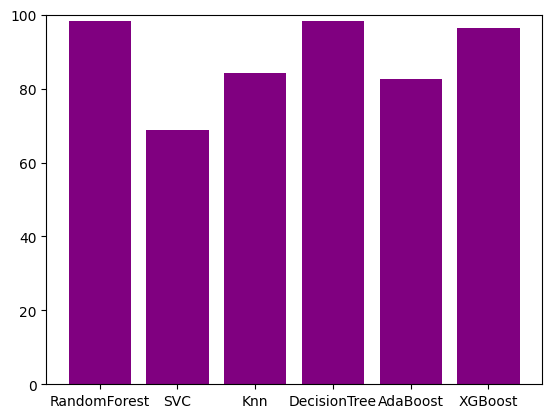

In [115]:
from matplotlib import pyplot as plt

plt.bar(score.keys(), score.values(), color="purple")
plt.ylim([0,100])